In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
image_path = '/Users/patricknaylor/Desktop/Field_Detection/Images/Masked/'
torch.__version__


/Users/patricknaylor/miniconda3/envs/field_detect/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/patricknaylor/miniconda3/envs/field_detect/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <F0D48035-EF9E-3141-9F63-566920E60D7C> /Users/patricknaylor/miniconda3/envs/field_detect/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <B8EF5F9B-D0C8-3F96-967D-FE1E5F7F9E51> /Users/patricknaylor/miniconda3/envs/field_detect/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


'2.0.0.dev20221209'

In [2]:

images_paths = glob.glob(image_path + '*.jpg')
mask_paths = glob.glob(image_path + '*.npy')
images = []
masks = []
for (img, msk) in zip(images_paths, mask_paths):
    images.append(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    masks.append(np.load(msk).T)


In [3]:
images_arr = np.stack(images)
masks_arr = np.stack(masks)
masks_arr = np.expand_dims(masks_arr[:, 25: -25, 25: -25], axis=3)
data_arr = np.concatenate((images_arr, masks_arr), axis=3)

In [4]:
images_arr = images_arr.astype(np.uint8)

In [5]:


class imageDataset(Dataset):
    def __init__(self, X):
        self.X = X

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        image = self.X[index]

        X = self.transform(image)
        return X

    transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()])


    

In [6]:
batch_size = 64
transformed_dataset = imageDataset(X= images_arr)
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, pin_memory=True)
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

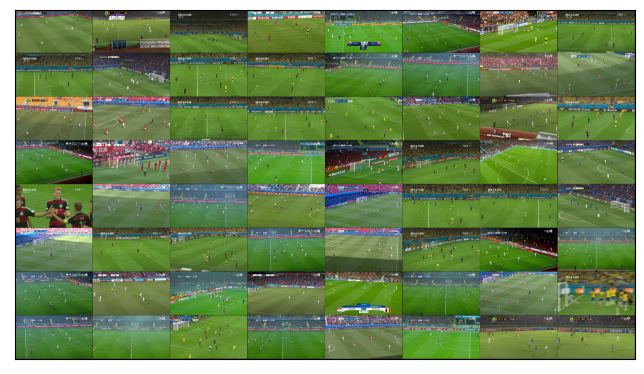

In [7]:
show_batch(train_dl)